## ⚙️ CELL 1 — Project Header (System

# Codveda Technology Internship
# Level 1 - Data Cleaning & Exploratory Data Analysis (EDA)
# Project: Customer Churn Analysis
# Author: Rakesh Mahakur
# GitHub: https://github.com/rakesh-analytics-ops

"""
This notebook focuses on cleaning and exploring a telecom churn dataset.
The goal is to understand customer behavior, identify churn patterns,
and prepare the data for machine learning models.
"""


## ⚙️ CELL 2 — Load Libraries

import the required Python libraries for data processing and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## ⚙️ CELL 3 — Load Dataset

“Here, I load the churn dataset and preview the first few rows to understand the structure.”

In [2]:
df = pd.read_csv(r"D:\codveda\Data Set For Task\Churn Prdiction Data\churn-bigml-80.csv")
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## ⚙️ CELL 4 — Dataset Info

check data types and missing values to assess overall data quality.

In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## ⚙️ CELL 5 — Target Distribution

“This shows how balanced the churn and non-churn customers are.”

In [5]:
df['Churn'].value_counts(normalize=True)


Churn
False    0.854464
True     0.145536
Name: proportion, dtype: float64

## ⚙️ CELL 6 — Encode Categorical Data

“I convert categorical features into numerical format using one-hot encoding.”

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


## ⚙️ CELL 8 — Contract vs Churn

“Month-to-month customers show higher churn risk.”

In [10]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
print(df.columns)


Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')


In [12]:
for col in df.columns:
    print(col)


State
Account_length
Area_code
International_plan
Voice_mail_plan
Number_vmail_messages
Total_day_minutes
Total_day_calls
Total_day_charge
Total_eve_minutes
Total_eve_calls
Total_eve_charge
Total_night_minutes
Total_night_calls
Total_night_charge
Total_intl_minutes
Total_intl_calls
Total_intl_charge
Customer_service_calls
Churn


In [13]:
[c for c in df.columns if "contract" in c.lower()]


[]

In [14]:
[c for c in df.columns if "churn" in c.lower()]


['Churn']

## ⚙️ CELL 9 — Correlation Heatmap

This heatmap helps identify relationships between numerical features

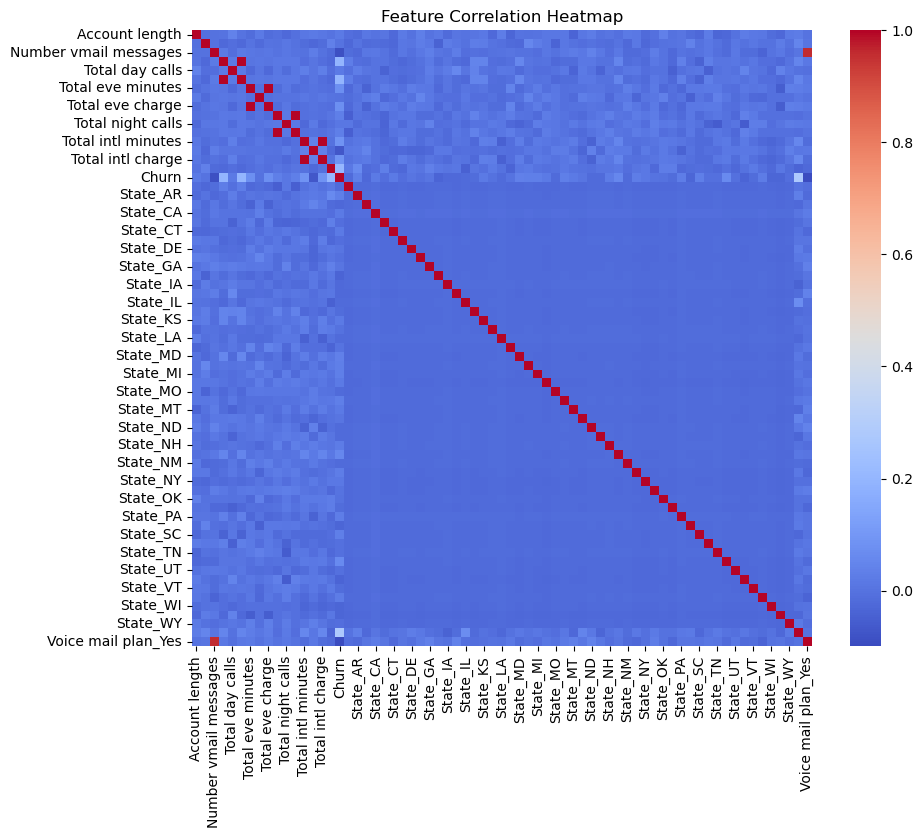

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
